In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
haberman=pd.read_csv('Haberman.csv')

In [57]:
haberman

,Patient_Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [58]:
haberman.shape                                      #To tell shape of dataset in format of (no. of rows, no. of cols.)

(306, 4)

In [59]:
haberman.columns                                   #Return all the column names

Index(['Patient_Age', 'Year_of_Operation', 'Positive_Axillary_Nodes',
       'Survival_Status'],
      dtype='object')

In [60]:
haberman['Survival_Status'].value_counts()

Survival_Status
1    225
2     81
Name: count, dtype: int64

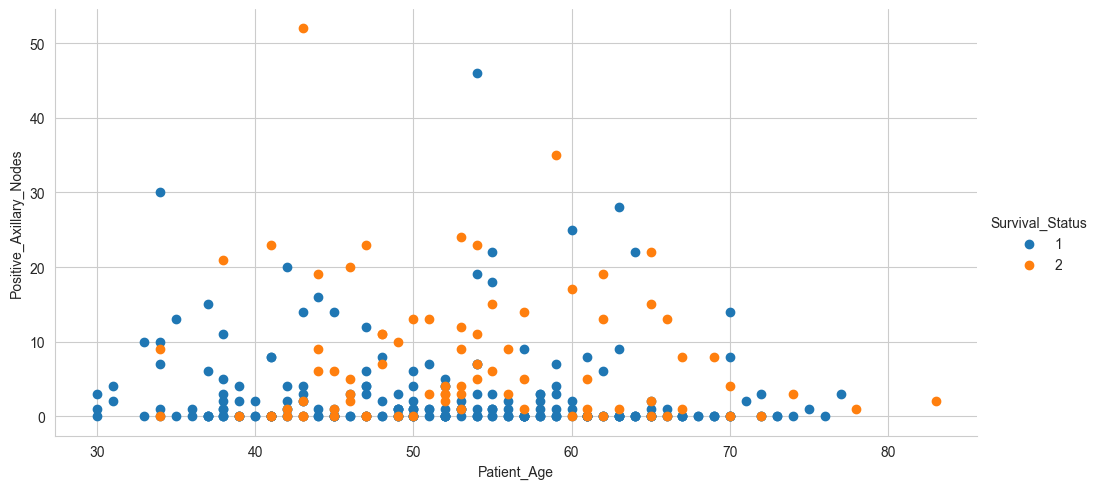

In [61]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='Survival_Status',height=5,aspect=2)\
   .map(plt.scatter,'Patient_Age','Positive_Axillary_Nodes')\
   .add_legend();
plt.show()

In [62]:
plt.close()

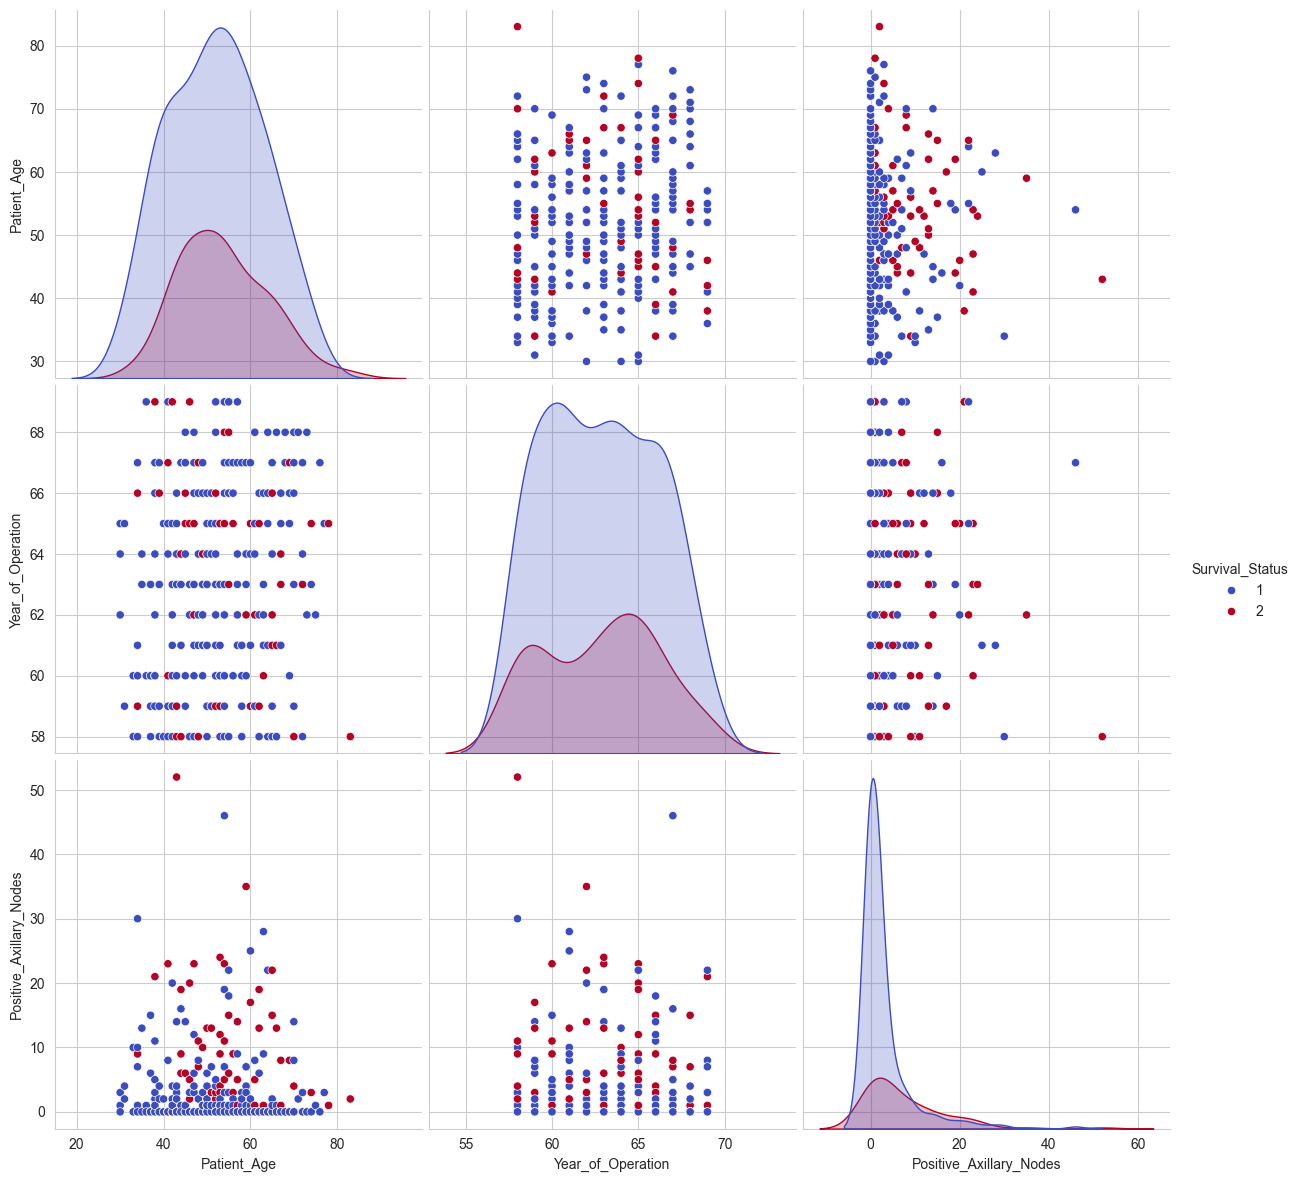

In [63]:
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='Survival_Status',height=4,palette='coolwarm')
plt.show()

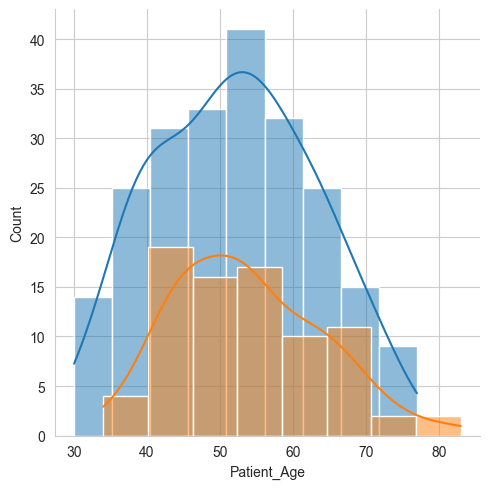

In [64]:
sns.FacetGrid(haberman,hue='Survival_Status',height=5)\
   .map(sns.histplot,'Patient_Age',kde=True)
plt.show()

In [65]:
hstatus1=haberman.loc[haberman['Survival_Status']==1]
hstatus2=haberman.loc[haberman['Survival_Status']==2]

In [66]:
hstatus1

,Patient_Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
298,73,68,0,1
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1


In [67]:
hstatus2

,Patient_Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2
...,...,...,...,...
286,70,58,4,2
293,72,63,0,2
299,74,65,3,2
304,78,65,1,2


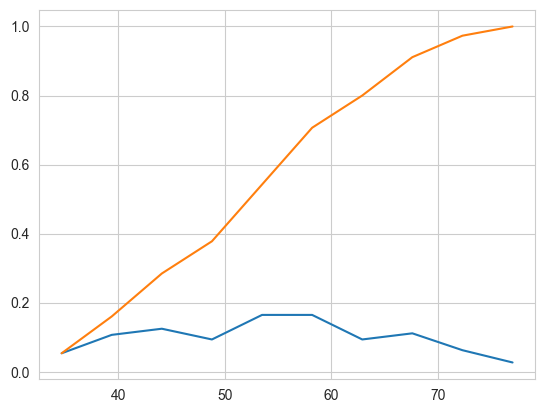

In [68]:
counts,bin_edges=np.histogram(hstatus1['Patient_Age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [69]:
np.mean(haberman['Patient_Age'])


52.45751633986928

In [70]:
np.std(haberman['Patient_Age'])

10.785785203631832

In [71]:
np.median(haberman['Patient_Age'])

52.0

In [72]:
np.percentile(haberman['Patient_Age'],25)

44.0

In [73]:
np.percentile(haberman['Patient_Age'],50)

52.0

In [74]:
np.percentile(haberman['Patient_Age'],75)

60.75

In [75]:
from statsmodels import robust

In [76]:
robust.mad(haberman['Patient_Age'])

11.860817748044816

<Axes: xlabel='Survival_Status', ylabel='Patient_Age'>

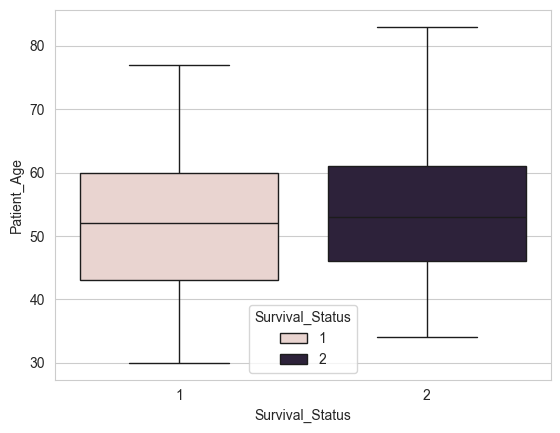

In [77]:
sns.boxplot(x='Survival_Status',y='Patient_Age',data=haberman,hue='Survival_Status')

<Axes: xlabel='Survival_Status', ylabel='Patient_Age'>

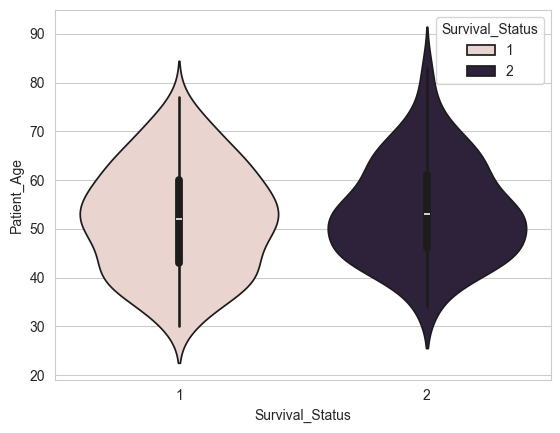

In [78]:
sns.violinplot(x='Survival_Status',y='Patient_Age',data=haberman,hue='Survival_Status')

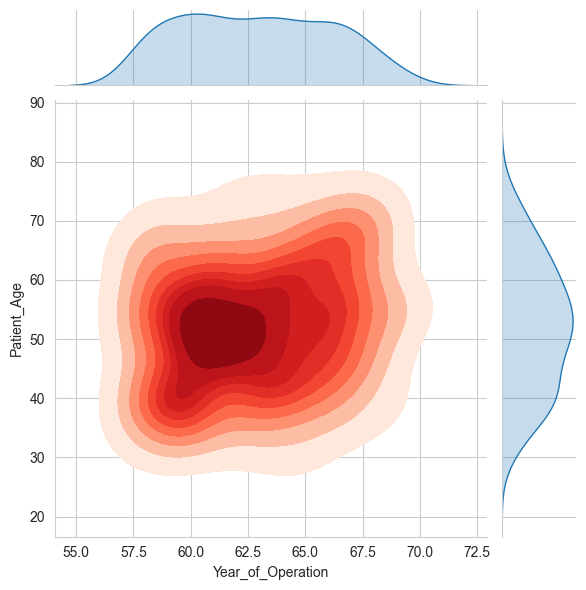

In [79]:
sns.jointplot(x='Year_of_Operation',y='Patient_Age',data=hstatus1,cmap='Reds',fill=True,kind='kde')